# SI 618 - Homework #4: Visualization, Correlation, and Linear Models

Version 2022.02.07.1.CT

### The total score for this assignment will be 100 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, punctuation, etc. of written sentences.
- 10 pt: Code is written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions. 

## We will be using two different datasets for the two different parts of this homework. Download the data from: 

* [https://www.kaggle.com/datasnaek/youtube-new](https://www.kaggle.com/datasnaek/youtube-new)

> YouTube provides a list of trending videos on it's site, determined by user interaction metrics such as likes, comments, and views. This dataset includes months of daily trending video across five different regions: the United States ("US"), Canada ("CA"), Great Britain ("GB"), Germany ("DE"), and France ("FR").

* https://www.kaggle.com/abcsds/pokemon

> This data set includes 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed.

## Part 1: Answer the questions below based on the *[YouTube dataset](https://www.kaggle.com/datasnaek/youtube-new)*
- Write Python code that can answer the following questions, and
- <b>Explain your answers in plain English. </b>

### <span style="color:magenta">  Q1. For 15 Points: Compare the distributions of comments, views, likes, and dislikes for </span>

* Plot histograms for these metrics *for Canada*. What can you say about them?
* Try to apply a log transformation, and plot the histograms again. How do they look now?
* Create a pairplot *for Canada*, as we did in this week's class. Do you see anything interesting?
* Create additional pairplots for the other four regions. Do they look similar?

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
canada = pd.read_csv('YouTube/CAvideos.csv')
canada.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


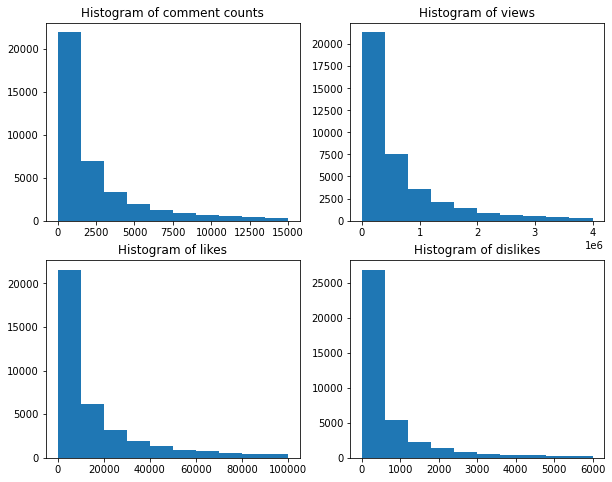

In [4]:
# 1. Plot histograms for "comments, views, likes, and dislikes" for Canada
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (10, 8))
ax1.hist(canada.comment_count, range=[0, 15000])
ax1.set_title('Histogram of comment counts')
ax2.hist(canada.views, range=[0, 4e6])
ax2.set_title('Histogram of views')
ax3.hist(canada.likes, range=[0, 1e5])
ax3.set_title('Histogram of likes')
ax4.hist(canada.dislikes, range=[0, 6000])
ax4.set_title('Histogram of dislikes')
plt.show()

Text(0.5, 1.0, 'Log-histogram of dislikes')

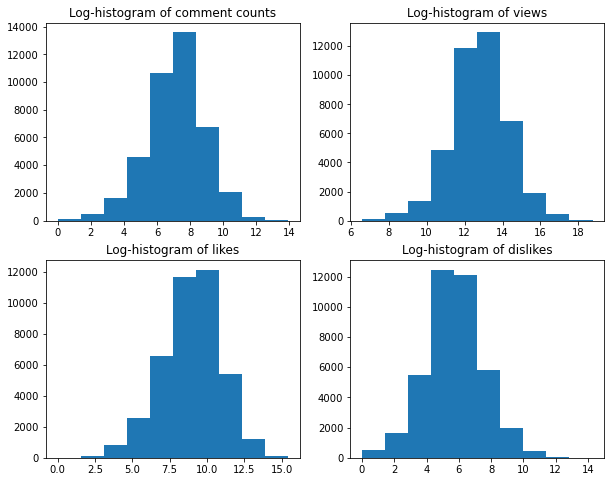

In [5]:
# 2. log transformation of the above graphs (select only finite values)
canada['comment_log'] = np.log(canada['comment_count'])
canada['views_log'] = np.log(canada['views'])
canada['likes_log'] = np.log(canada['likes'])
canada['dislikes_log'] = np.log(canada['dislikes'])

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (10, 8))
ax1.hist(canada['comment_log'][np.isfinite(canada['comment_log'])])
ax1.set_title('Log-histogram of comment counts')
ax2.hist(canada['views_log'][np.isfinite(canada['views_log'])])
ax2.set_title('Log-histogram of views')
ax3.hist(canada['likes_log'][np.isfinite(canada['likes_log'])])
ax3.set_title('Log-histogram of likes')
ax4.hist(canada['dislikes_log'][np.isfinite(canada['dislikes_log'])])
ax4.set_title('Log-histogram of dislikes')

Text(0.5, 1, 'Pairplots for Canada (before log transformation)')

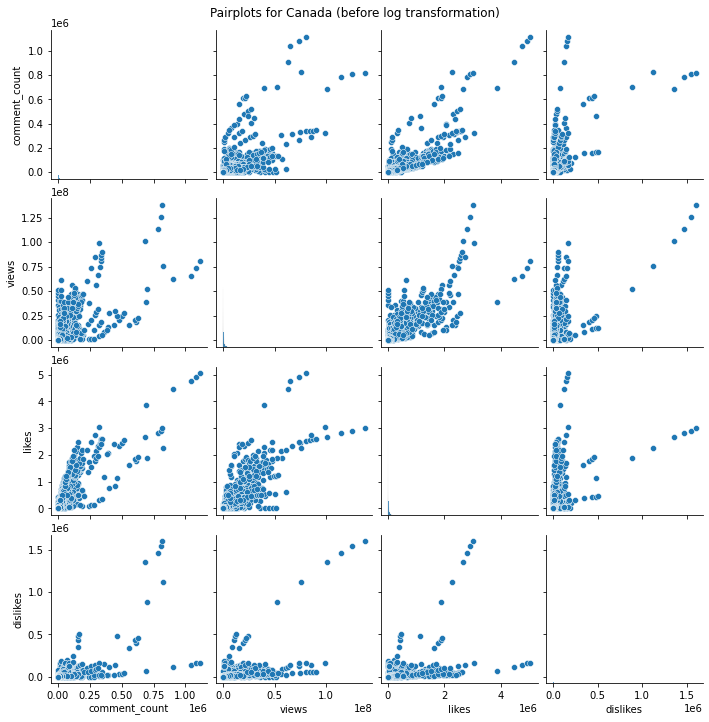

In [6]:
# 3. Create a pairplot for Canada
# before log transformation
ca = sns.pairplot(canada, vars=['comment_count','views','likes','dislikes'])
ca.fig.suptitle('Pairplots for Canada (before log transformation)', y=1)

Text(0.5, 1, 'Pairplots for Canada (after log transformation)')

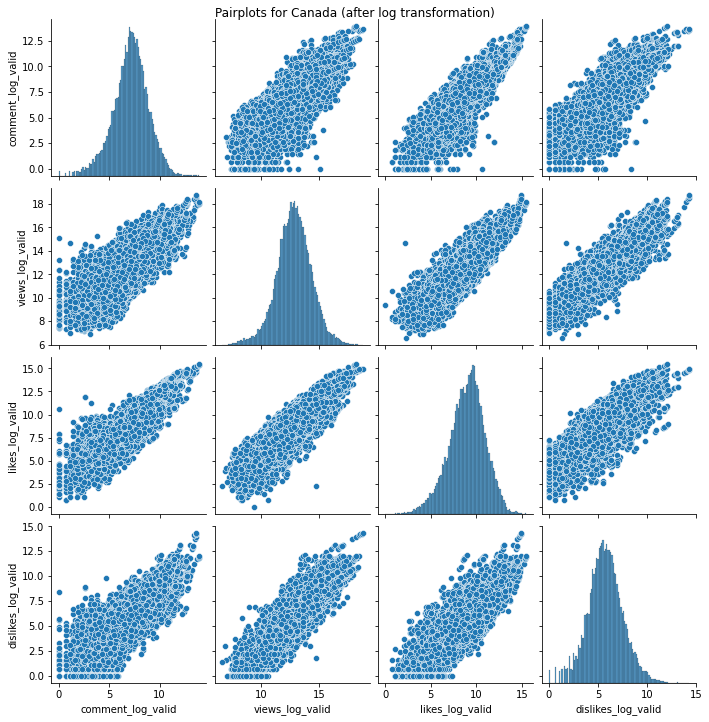

In [7]:
# after log transformation
canada['comment_log_valid'] = canada['comment_log'][np.isfinite(canada['comment_log'])]
canada['views_log_valid'] = canada['views_log'][np.isfinite(canada['views_log'])]
canada['likes_log_valid'] = canada['likes_log'][np.isfinite(canada['likes_log'])]
canada['dislikes_log_valid'] = canada['dislikes_log'][np.isfinite(canada['dislikes_log'])]
ca_plot = sns.pairplot(canada, vars=['comment_log_valid','views_log_valid','likes_log_valid','dislikes_log_valid'])
ca_plot.fig.suptitle('Pairplots for Canada (after log transformation)', y=1)

In [97]:
# 4. Create additional pairplots for the other four regions
# Other four regions: the United States ("US"), Great Britain ("GB"), Germany ("DE"), and France ("FR")
us = pd.read_csv('YouTube/USvideos.csv')
gb = pd.read_csv('YouTube/GBvideos.csv')
de = pd.read_csv('YouTube/DEvideos.csv')
fr = pd.read_csv('YouTube/FRvideos.csv')

Text(0.5, 1, 'Pairplots for the United States')

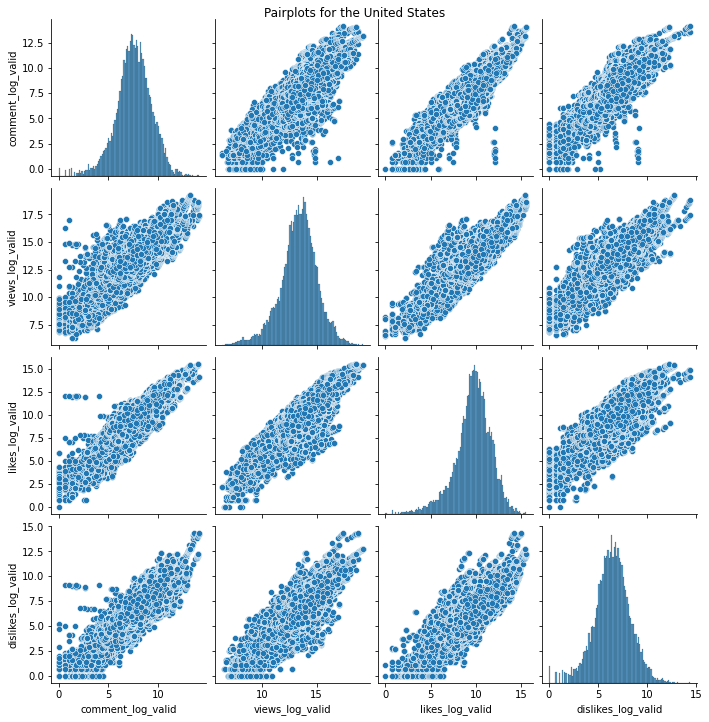

In [107]:
# United States
us['comment_log'] = np.log(us['comment_count'])
us['views_log'] = np.log(us['views'])
us['likes_log'] = np.log(us['likes'])
us['dislikes_log'] = np.log(us['dislikes'])

us['comment_log_valid'] = us['comment_log'][np.isfinite(us['comment_log'])]
us['views_log_valid'] = us['views_log'][np.isfinite(us['views_log'])]
us['likes_log_valid'] = us['likes_log'][np.isfinite(us['likes_log'])]
us['dislikes_log_valid'] = us['dislikes_log'][np.isfinite(us['dislikes_log'])]

us_plot = sns.pairplot(us, vars=['comment_log_valid','views_log_valid','likes_log_valid','dislikes_log_valid'])
us_plot.fig.suptitle('Pairplots for the United States', y=1)

Text(0.5, 1, 'Pairplots for Great Britain')

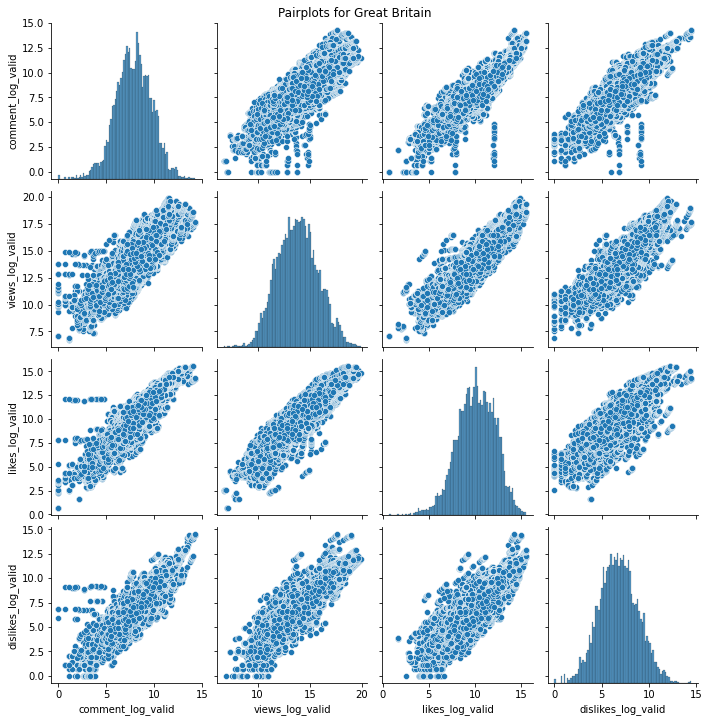

In [106]:
# Great Britain
gb['comment_log'] = np.log(gb['comment_count'])
gb['views_log'] = np.log(gb['views'])
gb['likes_log'] = np.log(gb['likes'])
gb['dislikes_log'] = np.log(gb['dislikes'])

gb['comment_log_valid'] = gb['comment_log'][np.isfinite(gb['comment_log'])]
gb['views_log_valid'] = gb['views_log'][np.isfinite(gb['views_log'])]
gb['likes_log_valid'] = gb['likes_log'][np.isfinite(gb['likes_log'])]
gb['dislikes_log_valid'] = gb['dislikes_log'][np.isfinite(gb['dislikes_log'])]

gb_plot = sns.pairplot(gb, vars=['comment_log_valid','views_log_valid','likes_log_valid','dislikes_log_valid'])
gb_plot.fig.suptitle('Pairplots for Great Britain', y=1)

Text(0.5, 1, 'Pairplots for Germany')

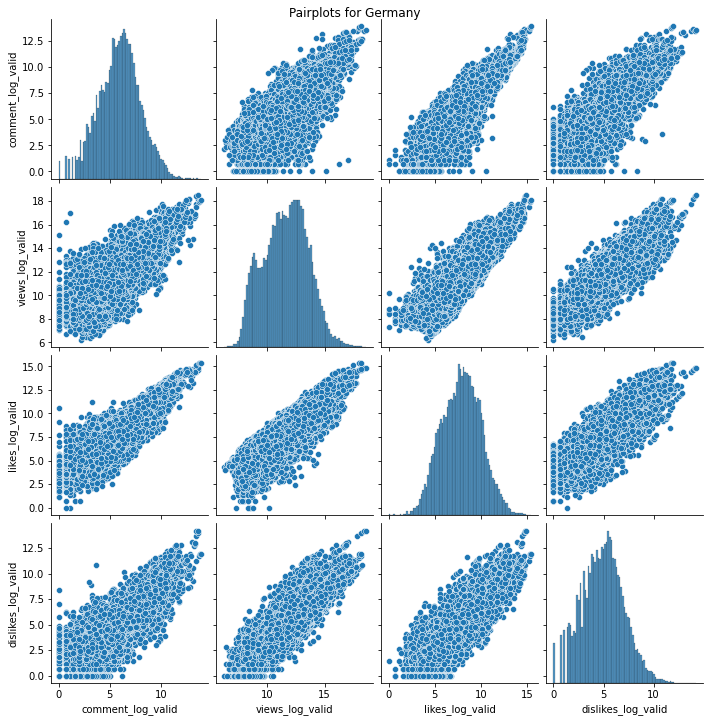

In [109]:
# Germany
de['comment_log'] = np.log(de['comment_count'])
de['views_log'] = np.log(de['views'])
de['likes_log'] = np.log(de['likes'])
de['dislikes_log'] = np.log(de['dislikes'])

de['comment_log_valid'] = de['comment_log'][np.isfinite(de['comment_log'])]
de['views_log_valid'] = de['views_log'][np.isfinite(de['views_log'])]
de['likes_log_valid'] = de['likes_log'][np.isfinite(de['likes_log'])]
de['dislikes_log_valid'] = de['dislikes_log'][np.isfinite(de['dislikes_log'])]

de_plot = sns.pairplot(de, vars=['comment_log_valid','views_log_valid','likes_log_valid','dislikes_log_valid'])
de_plot.fig.suptitle('Pairplots for Germany', y=1)

Text(0.5, 1, 'Pairplots for France')

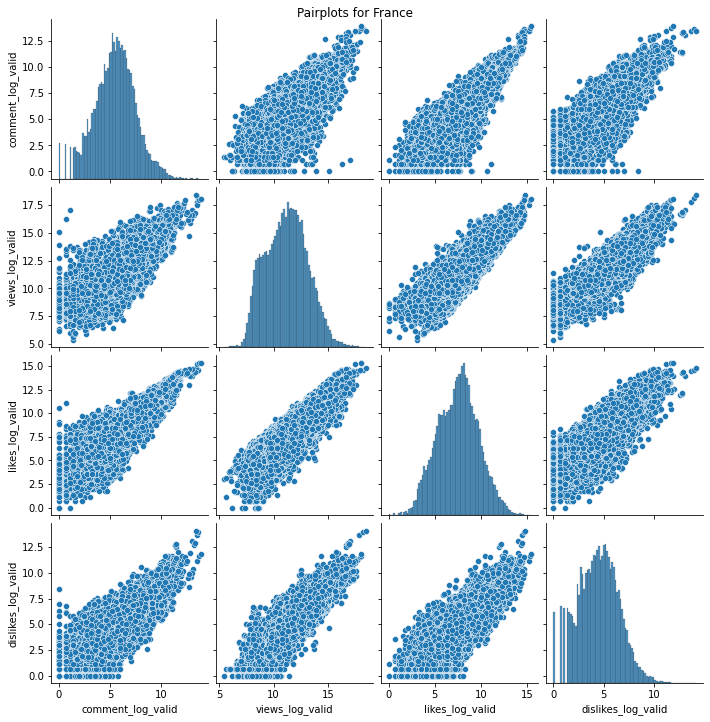

In [110]:
# France
fr['comment_log'] = np.log(fr['comment_count'])
fr['views_log'] = np.log(fr['views'])
fr['likes_log'] = np.log(fr['likes'])
fr['dislikes_log'] = np.log(fr['dislikes'])

fr['comment_log_valid'] = fr['comment_log'][np.isfinite(fr['comment_log'])]
fr['views_log_valid'] = fr['views_log'][np.isfinite(fr['views_log'])]
fr['likes_log_valid'] = fr['likes_log'][np.isfinite(fr['likes_log'])]
fr['dislikes_log_valid'] = fr['dislikes_log'][np.isfinite(fr['dislikes_log'])]

fr_plot = sns.pairplot(fr, vars=['comment_log_valid','views_log_valid','likes_log_valid','dislikes_log_valid'])
fr_plot.fig.suptitle('Pairplots for France', y=1)

**Answer.** 
1. The four histograms for "comments, views, likes, and dislikes" for Canada are plotted above. The trends are all similar but the ranges are different. However, it is clear that all the plots are right-skewed, which will result in poor analysis of the data, so a log transformation is conducted for each of the plot.
1. The histograms after log transformation show normal distributions of the four data.
1. The two pairplots for Canada are plotted. The first uses the original data, and the other uses the data after log transformation. It is clear that the distribution of each variable looks like normal distribution and each metric has a linear relationship with each of the three other metrics.
1. The pairplots for the other four regions are also plotted above. They look similar. Each variable has a normal distribution and it has linear relationshipes with other three varibles.

### <span style="color:magenta"> Q2. For 10 Points: Create a heatmap of correlations between the variables for a region of your choice </span>

>A [heat map (or heatmap)](https://en.wikipedia.org/wiki/Heat_map) is a graphical representation of data where the individual values contained in a matrix are represented as colors.

Seaborn makes it easy to create a heatmap with [`seaborn.heatmap()`](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

* Create a correlation matrix for your numeric variables using Pandas with [`DataFrame.corr()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html). That is, if your dataframe is called `df`, use `df.corr()`.
* Pass in your correlation matrix to `seaborn.heatmap()`, and annotate it with the parameter `annot=True`.
* Experiment with colormaps that are different from the default one and choose one that you think is best.  Comment on why you think so.
* Are there any interesting correlations? What are they?

In [8]:
# Create the correlation matrix
canada_corr = canada.corr()
canada_corr

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,comment_log,views_log,likes_log,dislikes_log,comment_log_valid,views_log_valid,likes_log_valid,dislikes_log_valid
category_id,1.000000,-0.139610,-0.144363,-0.028731,-0.068848,0.038741,0.018377,-0.030002,-0.082847,-0.152659,-0.137198,-0.097063,-0.082847,-0.152659,-0.137198,-0.097063
views,-0.139610,1.000000,0.828964,0.557621,0.693107,0.004424,0.005745,0.001928,0.411075,0.522380,0.429392,0.479188,0.411075,0.522380,0.429392,0.479188
likes,-0.144363,0.828964,1.000000,0.460427,0.836585,-0.023057,-0.024729,0.001953,0.446473,0.454392,0.467685,0.446327,0.446473,0.454392,0.467685,0.446327
dislikes,-0.028731,0.557621,0.460427,1.000000,0.643494,-0.005282,-0.008762,0.000636,0.188522,0.190830,0.166657,0.242169,0.188522,0.190830,0.166657,0.242169
comment_count,-0.068848,0.693107,0.836585,0.643494,1.000000,-0.028109,-0.016602,0.003117,0.387735,0.330454,0.335602,0.353229,0.387735,0.330454,0.335602,0.353229
comments_disabled,0.038741,0.004424,-0.023057,-0.005282,-0.028109,1.000000,0.147903,-0.003092,NaN,-0.052756,-0.090056,-0.041255,NaN,-0.052756,-0.090056,-0.041255
ratings_disabled,0.018377,0.005745,-0.024729,-0.008762,-0.016602,0.147903,1.000000,-0.002131,-0.050357,-0.035502,NaN,NaN,-0.050357,-0.035502,NaN,NaN
video_error_or_removed,-0.030002,0.001928,0.001953,0.000636,0.003117,-0.003092,-0.002131,1.000000,0.000198,0.002191,0.001795,0.006900,0.000198,0.002191,0.001795,0.006900
comment_log,-0.082847,0.411075,0.446473,0.188522,0.387735,NaN,-0.050357,0.000198,1.000000,0.773056,0.874338,0.802973,1.000000,0.773056,0.874338,0.802973
views_log,-0.152659,0.522380,0.454392,0.190830,0.330454,-0.052756,-0.035502,0.002191,0.773056,1.000000,0.837414,0.886470,0.773056,1.000000,0.837414,0.886470


Text(0.5, 1.0, 'Heatmap of correlations between the variables for Canada')

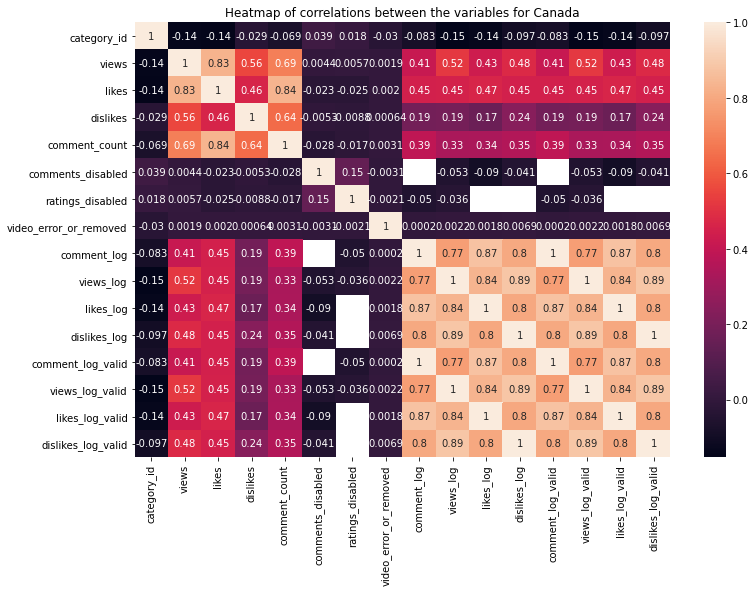

In [9]:
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(canada_corr, annot=True)
ax.set_title('Heatmap of correlations between the variables for Canada')

**Answer.**
1. After experimenting with colormaps for different regions, I found that all colormaps look familiar, so I still create a heatmap of correlations between the variables for Canada.
1. From the graph above, it can be observed that, the data after log transformation show much higher correlations than the original data, indicating the linear relationships.
1. Comments, views, likes, and dislikes are more related than comments_disabled, ratings_disabled and video_error_or_removed.
1. There exist negative correlations between likes, dislikes, comment_count and comments_disabled, ratings_disabled and video_error_or_removed, though the negative correlations are small.

### <span style="color:magenta"> Q3. For 15 points: Create and compare OLS models using variables of your choice, for a region of your choice </span>
* Use statsmodels to perform an ANOVA (categorical regression) of a variable of your choice as the dependent variable (for example, views) and the video category as the independent variable. Note that you need to use a categorical variable as your independent variable.
* Provide your interpretation of the results. 
* Create two different regression models where the dependent variable is the same, and the independent variables are different.  Note that your independent variable needs to be a continuous numerical variables. What does your interpretation say about the two models?

In [10]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

In [5]:
# 1. Perform an ANOVA
res = smf.ols('views ~ C(category_id)', canada).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  views   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     148.9
Date:                Mon, 14 Feb 2022   Prob (F-statistic):               0.00
Time:                        08:41:41   Log-Likelihood:            -6.7156e+05
No. Observations:               40881   AIC:                         1.343e+06
Df Residuals:                   40864   BIC:                         1.343e+06
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1.427e+06 

In [6]:
# 2. Regression model between views and comments_disabled
res2 = smf.ols('views ~ C(comments_disabled)', canada).fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                  views   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8003
Date:                Mon, 14 Feb 2022   Prob (F-statistic):              0.371
Time:                        08:42:29   Log-Likelihood:            -6.7272e+05
No. Observations:               40881   AIC:                         1.345e+06
Df Residuals:                   40879   BIC:                         1.345e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [83]:
# 3. Regression model between views and video_error_or_removed
res3 = smf.ols('views ~ C(video_error_or_removed)', canada).fit()
print(res3.summary())

                            OLS Regression Results                            
Dep. Variable:                  views   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1520
Date:                Tue, 15 Feb 2022   Prob (F-statistic):              0.697
Time:                        09:29:07   Log-Likelihood:            -6.7272e+05
No. Observations:               40881   AIC:                         1.345e+06
Df Residuals:                   40879   BIC:                         1.345e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

**Answer.**
1. In this case, I use statsmodels to perform an ANOVA for Canada with views being the dependent variable and the video category as the independent variable. From the regression model, the p-value is 0.00. Suppose alpha value is 0.05, then as 0.00 < 0.05, the null hypothesis is rejected. There is a statistically significant difference between views and different video categories.
1. The other two different regression models take views as the dependent variable and comments_disabled and video_error_or_removed as independent variables.
    1. For the regression model between views and comments_disabled, the p-value is 0.371. Suppose alpha value is 0.05, then as 0.371 > 0.05, there is no statistically significant difference between views and comments_disabled.
    1. For the regression model between views and video_error_or_removed, the p-value is 0.697. Suppose alpha value is 0.05, then as 0.697 > 0.05, there is no statistically significant difference between views and video_error_or_removed.

## Part 2: Answer the questions below based on the *[Pokémon dataset](https://www.kaggle.com/abcsds/pokemon)* </span>
- Write Python code that can answer the following questions, and
- Explain your answers in plain English. 

In [3]:
pokemon = pd.read_csv('pokemon.csv')
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


### <span style="color:magenta"> Q4. For 10 Points: Plot the pairs of different ability points (HP, Attack, Sp. Attack, Defense, etc.). </span>

* Which pairs have the most/least correlation coefficients?

In [4]:
pokemon_corr = pokemon[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].corr()
pokemon_corr

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
HP,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952
Attack,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240
Defense,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227
Sp. Atk,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018
Sp. Def,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133
Speed,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000


Text(0.5, 1.0, 'Heatmap of correlations between different ability points')

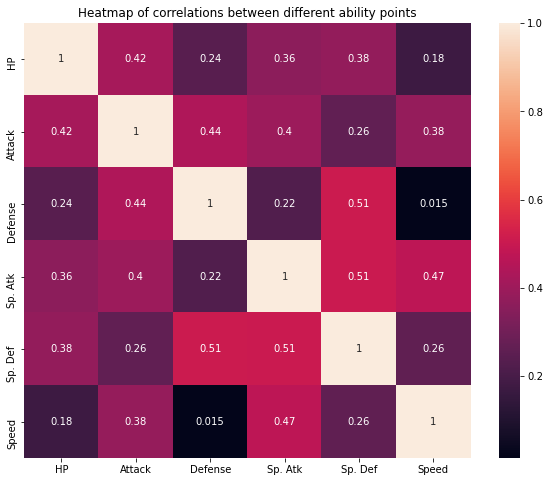

In [7]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(pokemon_corr, annot=True)
ax.set_title('Heatmap of correlations between different ability points')

**Answer.**

In order to show the correlations between different pairs, a heatmap is created and shown above. 

From the heatmap, it can be found that the two pairs, Special Defence (Sp. Def) and Defence, Special Defence (Sp. Def) and Special Attack (Sp. Atk), have the most correlation coefficients (0.51). Speed and Defense has the least correlation coefficient (0.015).

### <span style="color:magenta"> Q5. For 15 Points: Plot the distribution of ability points per Pokémon type </span>

* How would you describe each Pokémon type with different ability points?

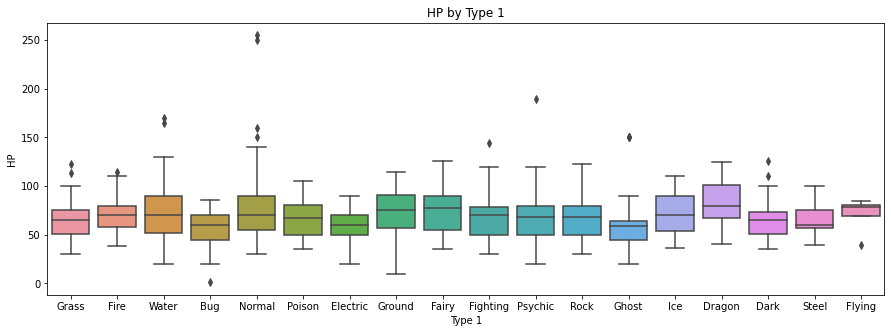

In [8]:
pokemon_ability = pokemon.drop(['Generation','Total', 'Legendary'], axis = 1) 

# 1. Distribution of HP per Pokemon type in Type 1
plt.subplots(figsize = (15,5))
plt.title('HP by Type 1')
sns.boxplot(x = "Type 1", y = "HP",data = pokemon_ability)
plt.show()

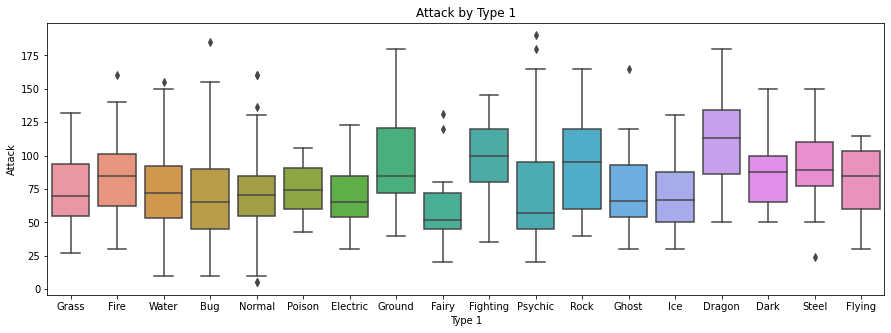

In [9]:
# 2. Distribution of Attack per Pokemon type in Type 1
plt.subplots(figsize = (15,5))
plt.title('Attack by Type 1')
sns.boxplot(x = "Type 1", y = "Attack",data = pokemon_ability)
plt.show()

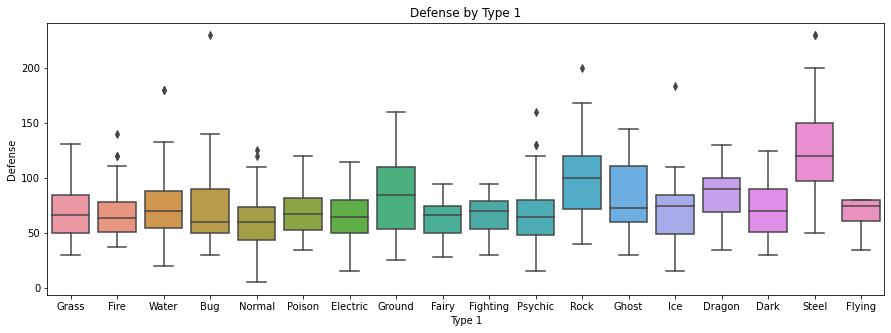

In [10]:
# 3. Distribution of Defense per Pokemon type in Type 1
plt.subplots(figsize = (15,5))
plt.title('Defense by Type 1')
sns.boxplot(x = "Type 1", y = "Defense",data = pokemon_ability)
plt.show()

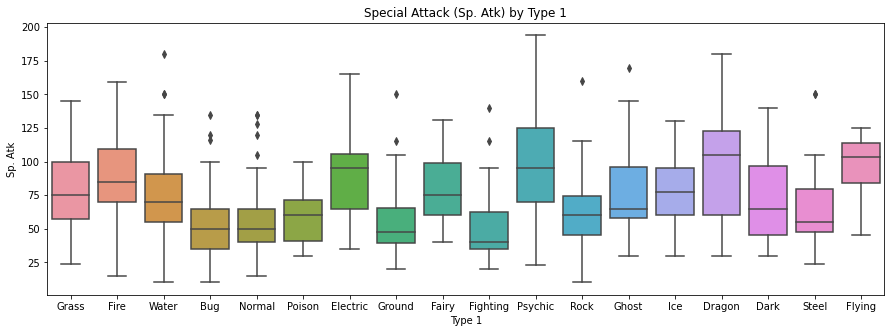

In [11]:
# 4. Distribution of Special Attack per Pokemon type in Type 1
plt.subplots(figsize = (15,5))
plt.title('Special Attack (Sp. Atk) by Type 1')
sns.boxplot(x = "Type 1", y = "Sp. Atk",data = pokemon_ability)
plt.show()

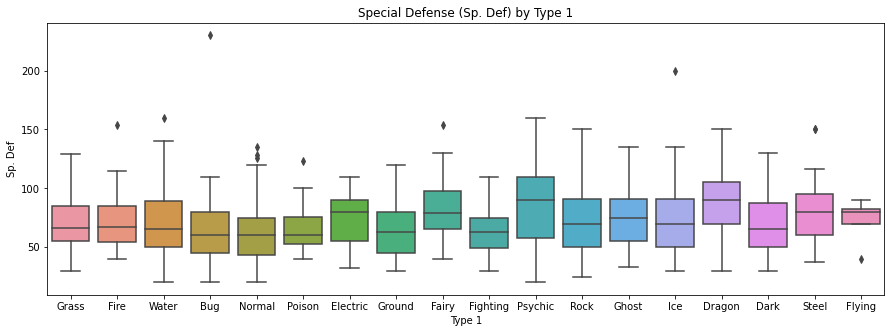

In [12]:
# 5. Distribution of Special Defense per Pokemon type in Type 1
plt.subplots(figsize = (15,5))
plt.title('Special Defense (Sp. Def) by Type 1')
sns.boxplot(x = "Type 1", y = "Sp. Def",data = pokemon_ability)
plt.show()

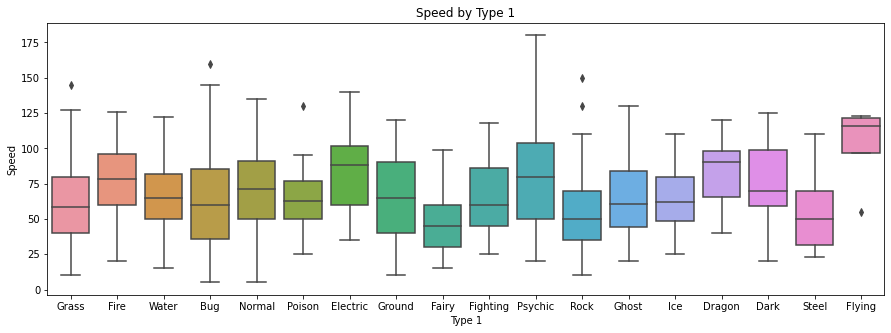

In [13]:
# 6. Distribution of Speed per Pokemon type in Type 1
plt.subplots(figsize = (15,5))
plt.title('Speed by Type 1')
sns.boxplot(x = "Type 1", y = "Speed",data = pokemon_ability)
plt.show()

**Answer**.

1. Six box plots shown the six abilities for all Pokémon types are plotted above. As the dataset description shows, 
    * Type 1 Each pokemon has a type, this determines weakness/resistance to attacks
    * Type 2: Some pokemon are dual type and have 2
    
    so here I use Type 1 to indicate all Pokémon types.
1. For HP, 
    1. Normal has the maximum value and Ground has the minimum value.
    1. Dragon and Flying have the maximum median values while Ghost and Steel have the minimum median values.
    1. HP data of Steel and Flying are skewed seriously so the distributions might not be close to normal.
    1. Flying has the least spread, so their HPs are less variable than other types.
    1. Phychic has the largest outlier value which may have a strong effect on data analysis.
1. For Attack,
    1. Ground has the maximum value while Water, Bug and Normal have the minimum values.
    1. Dragon has the maximum median value while Fairy has the minimum median value.
    1. Fairy's data is skewed seriously so most of them have the relatively low Attack points.
    1. Phychich and Bug have the largest outliers in their ability points which need to be removed when analysing.
1. For Defense,
    1. Steel has the maximum value and Normal has the minimum value.
    1. Steel has the maximum median value while Bug and Normal have the minimum median values.
    1. Rock has the largest outlier value.
    1. Flying has the least spread so their defense points are concentrated.
1. For Special Attack,
    1. Phychic has the maximum value while Water, Bug and Rock have the minimum values.
    1. Dragon has the maximum median value while Fighting has the minimum median value.
    1. Normal has most outliers and Water has the largest outlier value.
1. For Special Defense,
    1. Phychic has the maximum value and Phychic has the minimum value.
    1. Phychic and dragon have the maximum median values while Bug, Normal and Poison have the minimum median values.
    1. Normal has most outliers and Ice has the largest outlier value.
    1. Flying has the least spread so their special defense points are concentrated.
1. For Speed,
    1. Phychic has the maximum value while Bug and Normal are slowest.
    1. Flying has the maximum median value while Fairy has the least median value.
    1. Rock has most outliers and Bug has the largest outlier value.
    1. Flying has the least spread so they are fast in general.

### <span style="color:magenta"> Q6. For 15 Points: Explore how the Pokémon in each generation differ from each other? </span>

* Do you think designers of *Pokémon* tried to address different distributions of ability points in each generation?

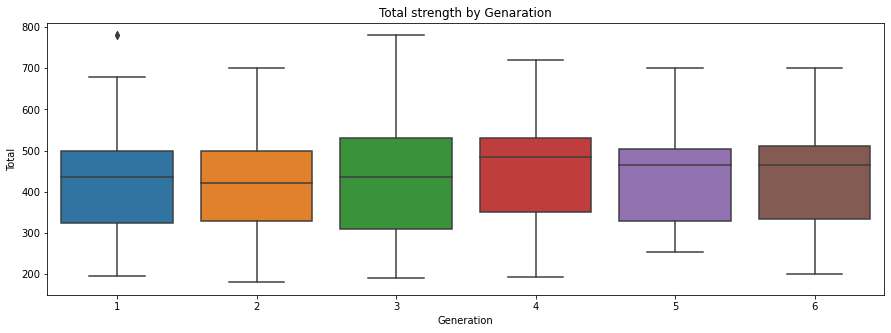

In [82]:
plt.subplots(figsize = (15,5))
plt.title('Total strength by Genaration')
sns.boxplot(x = "Generation", y = "Total",data = pokemon)
plt.show()

<AxesSubplot:xlabel='Generation'>

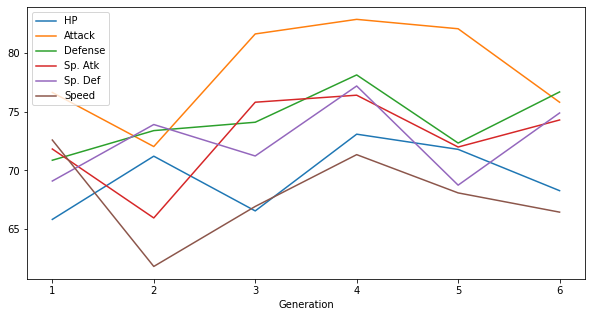

In [79]:
pokemon_generation = pokemon.groupby('Generation').mean()[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
pokemon_generation.plot.line(figsize=(10,5))

In [107]:
res1 = smf.ols('Q("HP") ~ Generation', pokemon).fit()
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:                Q("HP")   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.758
Date:                Tue, 15 Feb 2022   Prob (F-statistic):             0.0972
Time:                        11:04:34   Log-Likelihood:                -3725.3
No. Observations:                 800   AIC:                             7455.
Df Residuals:                     798   BIC:                             7464.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     66.2608      2.018     32.834      0.0

In [108]:
res2 = smf.ols('Q("Attack") ~ Generation', pokemon).fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:            Q("Attack")   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.118
Date:                Tue, 15 Feb 2022   Prob (F-statistic):              0.146
Time:                        11:05:08   Log-Likelihood:                -3917.5
No. Observations:                 800   AIC:                             7839.
Df Residuals:                     798   BIC:                             7848.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     75.6601      2.566     29.483      0.0

In [109]:
res3 = smf.ols('Q("Defense") ~ Generation', pokemon).fit()
print(res3.summary())

                            OLS Regression Results                            
Dep. Variable:           Q("Defense")   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.438
Date:                Tue, 15 Feb 2022   Prob (F-statistic):              0.231
Time:                        11:05:23   Log-Likelihood:                -3885.8
No. Observations:                 800   AIC:                             7776.
Df Residuals:                     798   BIC:                             7785.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     71.1961      2.467     28.865      0.0

In [110]:
res4 = smf.ols('Q("Sp. Atk") ~ Generation', pokemon).fit()
print(res4.summary())

                            OLS Regression Results                            
Dep. Variable:           Q("Sp. Atk")   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.061
Date:                Tue, 15 Feb 2022   Prob (F-statistic):              0.303
Time:                        11:05:41   Log-Likelihood:                -3924.6
No. Observations:                 800   AIC:                             7853.
Df Residuals:                     798   BIC:                             7862.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     70.4346      2.589     27.207      0.0

In [111]:
res5 = smf.ols('Q("Sp. Def") ~ Generation', pokemon).fit()
print(res5.summary())

                            OLS Regression Results                            
Dep. Variable:           Q("Sp. Def")   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6481
Date:                Tue, 15 Feb 2022   Prob (F-statistic):              0.421
Time:                        11:06:01   Log-Likelihood:                -3795.2
No. Observations:                 800   AIC:                             7594.
Df Residuals:                     798   BIC:                             7604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     70.3165      2.202     31.929      0.0

In [112]:
res6 = smf.ols('Q("Speed") ~ Generation', pokemon).fit()
print(res6.summary())

                            OLS Regression Results                            
Dep. Variable:             Q("Speed")   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4268
Date:                Tue, 15 Feb 2022   Prob (F-statistic):              0.514
Time:                        11:06:13   Log-Likelihood:                -3829.9
No. Observations:                 800   AIC:                             7664.
Df Residuals:                     798   BIC:                             7673.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     69.6218      2.300     30.270      0.0

**Answer.**
1. To show the changes of ability for each generations, the box plot of total strength and the line plot of the mean of each ability are shown above.
1. From the box plot, it seems that there aren't many differences in the total strength of Pokémons for different generations. Their median values are similar and regions overlap a lot. But in total, it seems that Generation 3 is the strongest among all 6 generations.
1. However, for each ability, there do have some changes in the mean of each ability by generation. Most of them fluctuate in different generations but the main trend of each ability remains the same.
1. To conduct a more detailed analysis, ANOVA is conducted for each ability to see if the designers of Pokémon tried to address different distributions of ability points in each generation. Suppose alpha value is 0.05. It can be seen that all p-values are larger than 0.05. Therefore, there are no statistically significant differences between each ability and different generations.